In [2]:

import os
import csv
from sklearn.utils import shuffle
from scipy.ndimage import rotate
import cv2
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Reshape, Input, Conv2D, MaxPool2D,UpSampling2D, concatenate, Conv2DTranspose,BatchNormalization, merge
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.backend import tf as ktf
import matplotlib.image as mpimg
import zipfile
import pandas as pd
from scipy.ndimage import rotate
from keras.optimizers import RMSprop


Using TensorFlow backend.


In [0]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K  

In [4]:
import os
def upload_credential():
  token_dir = os.path.join(os.path.expanduser("~"),".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  print(token_file)
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file,'r') as f:
      pass
  except IOError as no_file:
    try:
      from google.colab import files
    except ImportError:
      raise no_file
    
    uploaded = files.upload()
    
    if "kaggle.json" not in uploaded:
      raise ValueError("You need an API key! see: "
                       "https://github.com/Kaggle/kaggle-api#api-credentials")
    with open(token_file, "wb") as f:
      f.write(uploaded["kaggle.json"])
    os.chmod(token_file, 600)

upload_credential()


/root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [5]:
!pip install kaggle
import kaggle

    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 235kB 7.0MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
competition_name = 'carvana-image-masking-challenge'


In [0]:
# Download data from Kaggle and unzip the files of interest. 
def load_data_from_zip(competition, file):
  with zipfile.ZipFile(os.path.join(competition, file), "r") as zip_ref:
    unzipped_file = zip_ref.namelist()[0]
    zip_ref.extractall(competition)

def get_data(competition):
    kaggle.api.competition_download_files(competition, competition)
    load_data_from_zip(competition, 'train.zip')
    load_data_from_zip(competition, 'train_masks.zip')
    load_data_from_zip(competition, 'train_masks.csv.zip')
    
get_data(competition_name)

In [0]:
# Download data from Kaggle and unzip the files of interest. 
def load_data_from_zip(competition, file):
  with zipfile.ZipFile(os.path.join(competition, file), "r") as zip_ref:
    unzipped_file = zip_ref.namelist()[0]
    zip_ref.extractall(competition)

In [0]:
load_data_from_zip(competition_name, 'test.zip')

In [0]:
load_data_from_zip(competition_name, 'sample_submission.csv.zip')

In [0]:
img_dir = os.path.join(competition_name, "train/")
img_test_dir = os.path.join(competition_name, "test/")
label_dir = os.path.join(competition_name, "train_masks/")
df_train = os.path.join(competition_name, 'train_masks.csv')
all_images = os.listdir(img_dir)
all_test_images = os.listdir(os.path.join(competition_name, "test/"))
samples = []
with open(df_train) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        


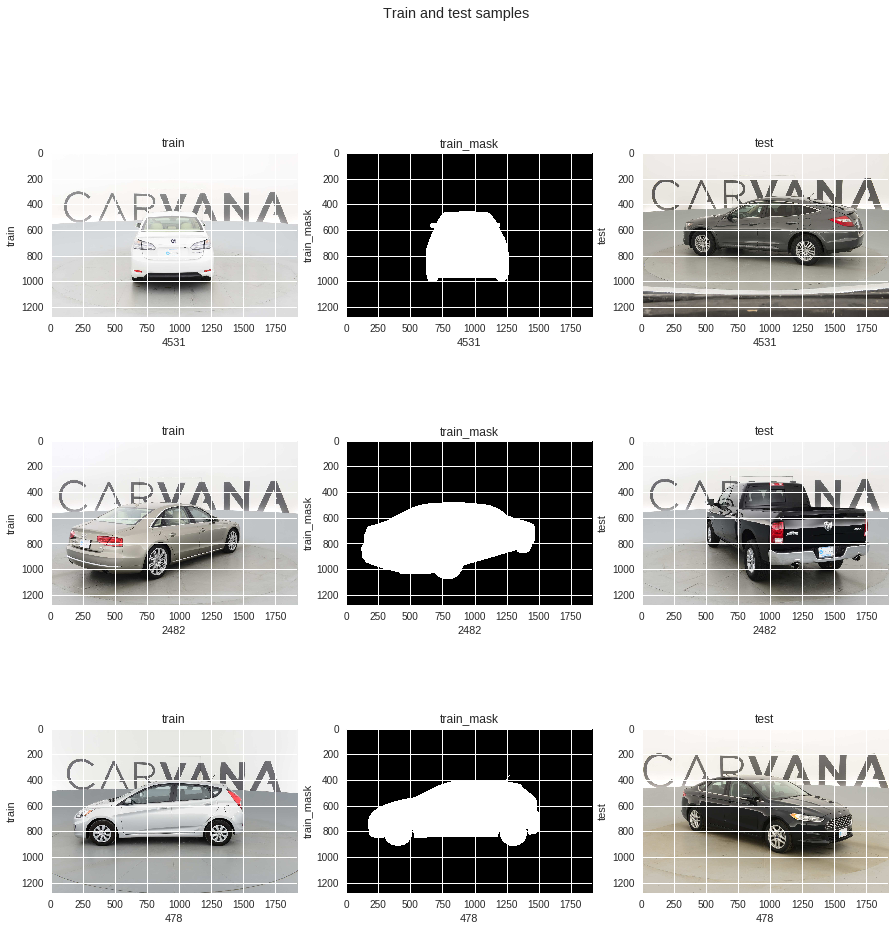

In [7]:
import random
import matplotlib.pyplot as plt
from PIL import Image



i=0
fig=plt.figure(figsize=(15,15))

for index in random.sample(range(len(samples)),3):
    x_pathname =img_dir+ all_images[index]
    y_pathname = label_dir+ all_images[index].split(".")[0] + '_mask.gif'
    x_testpathname=img_test_dir+ all_test_images[index]
    
    i=i+1
    ax1 = fig.add_subplot(3,3,i)
    ax1.set(ylabel='train', xlabel=index)
    ax1.set_title("train")
    ax1.imshow(mpimg.imread(x_pathname))
    
    i=i+1
    ax1 = fig.add_subplot(3,3,i)
    ax1.set(ylabel='train_mask', xlabel=index)
    ax1.set_title("train_mask")
    ax1.imshow(Image.open(y_pathname))
    
    i=i+1
    ax1 = fig.add_subplot(3,3,i)
    ax1.set(ylabel='test', xlabel=index)
    ax1.set_title("test")
    ax1.imshow(Image.open(x_testpathname))
    
plt.suptitle("Train and test samples")
plt.show()

In [0]:
#split trainging samples and validation samples
train_samples, validation_samples = train_test_split(samples, test_size=0.2)
train_samples = sklearn.utils.shuffle(train_samples)
validation_samples = sklearn.utils.shuffle(validation_samples)
num_train_examples = len(train_samples)
num_val_examples = len(validation_samples)

In [9]:
import numpy as np
# Number of training examples
n_train = len(train_samples)

# Number of validation examples
n_validation = len(validation_samples)

# Number of testing examples.
n_test = len(all_test_images)

# What's the shape of an traffic sign image?
image_shape = mpimg.imread(img_dir+ all_images[0]).shape


print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)


Number of training examples = 4071
Number of valid examples = 1018
Number of testing examples = 100064
Image data shape = (1280, 1918, 3)


In [0]:
from scipy.misc import imresize
dims = [128, 128] 


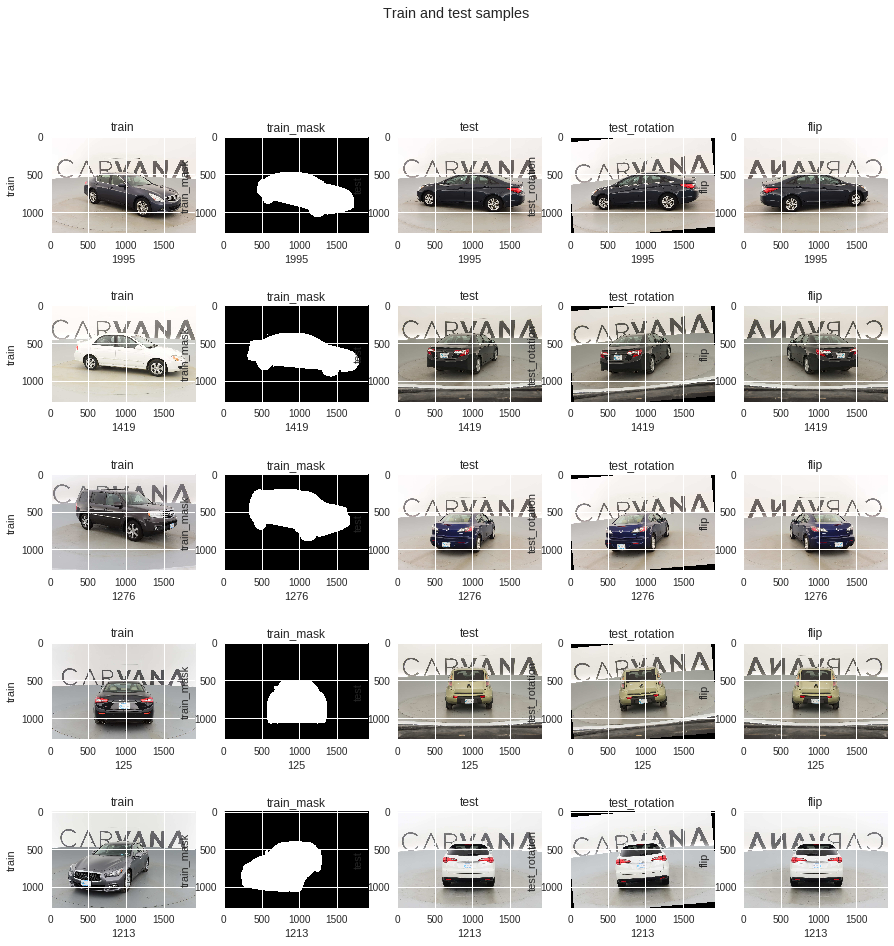

In [10]:
import random


i=0
fig=plt.figure(figsize=(15,15))

for index in random.sample(range(len(samples)),5):
    x_pathname =img_dir+ all_images[index]
    y_pathname = label_dir+ all_images[index].split(".")[0] + '_mask.gif'
    x_testpathname=img_test_dir+ all_test_images[index]
    
    i=i+1
    ax1 = fig.add_subplot(5,5,i)
    ax1.set(ylabel='train', xlabel=index)
    ax1.set_title("train")
    ax1.imshow(mpimg.imread(x_pathname))
    
    i=i+1
    ax1 = fig.add_subplot(5,5,i)
    ax1.set(ylabel='train_mask', xlabel=index)
    ax1.set_title("train_mask")
    ax1.imshow(load_img(y_pathname))
    
    i=i+1
    ax1 = fig.add_subplot(5,5,i)
    ax1.set(ylabel='test', xlabel=index)
    ax1.set_title("test")
    ax1.imshow(img_to_array(load_img(x_testpathname))/255)
    
    i=i+1
    ax1 = fig.add_subplot(5,5,i)
    ax1.set(ylabel='test_rotation', xlabel=index)
    ax1.set_title("test_rotation")
    randegree = random.uniform(-8, 8)
    ax1.imshow(rotate(load_img(x_testpathname), 5, reshape=False))
    
    i=i+1
    ax1 = fig.add_subplot(5,5,i)
    ax1.set(ylabel='flip', xlabel=index)
    ax1.set_title("flip")
    ax1.imshow(np.fliplr(load_img(x_testpathname)))
    
plt.suptitle("Train and test samples")
plt.show()

In [0]:
def generator(samples, batch_size=16):
    shuffle(samples)
    num_samples = len(samples)
    while 1:
            ix = np.random.choice(np.arange(len(samples)), batch_size)
            imgs = []
            labels = []
            for i in ix:
                # images
                img_id=samples[i][0].split('.')[0]
                try:
                    original_img = load_img(img_dir + samples[i][0])
                except Exception:
                    continue
#                 randegree = random.uniform(-8, 8)
                resized_img = imresize(original_img, dims+[3])
                flip_img=np.fliplr(resized_img)
                flip_img_array=img_to_array(flip_img)/255
                array_img = img_to_array(resized_img)/255
                rotate_image = rotate(resized_img, randegree, reshape=False)
                rotate_image_array=img_to_array(rotate_image)/255
                imgs.append(array_img)
                imgs.append(flip_img_array)
                imgs.append(rotate_image_array)
                
                
                # masks
                original_mask = load_img(label_dir + samples[i][0].split(".")[0] + '_mask.gif')
                resized_mask = imresize(original_mask, dims)
                flip_img_mask=np.fliplr(resized_mask)
                flip_img_mask_array=img_to_array(flip_img_mask)/255
                array_mask = img_to_array(resized_mask)/255
                rotate_image_mask = rotate(resized_mask, randegree, reshape=False)
                rotate_image_mask_array=img_to_array(rotate_image_mask)/255
                labels.append(array_mask[:, :, 0])
                labels.append(flip_img_mask_array[:, :, 0])
                labels.append(rotate_image_mask_array[:, :, 0])
            imgs = np.array(imgs)
            labels = np.array(labels)
            #yield imgs, labels.reshape(-1, dims[0], dims[1], 1)
            yield sklearn.utils.shuffle(imgs, labels.reshape(-1, dims[0], dims[1], 1))
    
    
#     while 0: # Loop forever so the generator never terminates
#         #shuffle(samples)
#         for offset in range(0, num_samples, batch_size):
#             batch_samples = samples[offset:offset+batch_size]
#             imgs = []
#             labels = []
#             for i in range(0, len(batch_samples)):
#                 # images
#                 #print("michael",batch_samples[i][0])
#                 img_id=batch_samples[i][0].split('.')[0]
#                 try:
#                     original_img = load_img(img_dir + batch_samples[i][0])
#                 except Exception:
#                     continue
#                 resized_img = imresize(original_img, dims+[3])
                
# #                 flip_img=np.fliplr(resized_img)
# #                 flip_img_array=img_to_array(flip_img)/255
                
# #                 rotate_image = rotate(resized_img, 5, reshape=False)
# #                 rotate_image_array=img_to_array(rotate_image)/255
                
#                 array_img = img_to_array(resized_img)/255
#                 flip_img=np.fliplr(array_img)
#                 imgs.append(array_img)
#                 imgs.append(flip_img)
# #                 imgs.append(flip_img_array)
# #                 imgs.append(rotate_image_array)
#                 # masks
#                 original_mask = load_img(label_dir + batch_samples[i][0].split(".")[0] + '_mask.gif')
#                 resized_mask = imresize(original_mask, dims)
                
# #                 flip_img_mask=np.fliplr(resized_mask)
# #                 flip_img_mask_array=img_to_array(flip_img_mask)/255
                
# #                 rotate_image_mask = rotate(resized_mask, 5, reshape=False)
# #                 rotate_image_mask_array=img_to_array(rotate_image_mask)/255
                
#                 array_mask = img_to_array(resized_mask)/255
#                 flip_img_mask=np.fliplr(array_mask)
#                 labels.append(array_mask[:, :, 0])
#                 labels.append(flip_img_mask[:, :, 0])
# #                 labels.append(flip_img_mask_array[:, :, 0])
# #                 labels.append(rotate_image_mask_array[:, :, 0])
#             imgs = np.array(imgs)
#             labels = np.array(labels)
#             yield imgs, labels.reshape(-1, dims[0], dims[1], 1)
            
            

In [0]:
train_generator = generator(train_samples, batch_size=16)
validation_generator = generator(validation_samples, batch_size=16)

In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


In [0]:
from keras.losses import binary_crossentropy

def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [0]:
inputs = Input(shape=(128, 128, 3))
    # 128

down1 = Conv2D(64, (3, 3), padding='same')(inputs)
down1 = BatchNormalization()(down1)
down1 = Activation('relu')(down1)
down1 = Conv2D(64, (3, 3), padding='same')(down1)
down1 = BatchNormalization()(down1)
down1 = Activation('relu')(down1)
down1_pool = MaxPooling2D((2, 2), strides=(2, 2))(down1)
# 64

down2 = Conv2D(128, (3, 3), padding='same')(down1_pool)
down2 = BatchNormalization()(down2)
down2 = Activation('relu')(down2)
down2 = Conv2D(128, (3, 3), padding='same')(down2)
down2 = BatchNormalization()(down2)
down2 = Activation('relu')(down2)
down2_pool = MaxPooling2D((2, 2), strides=(2, 2))(down2)
# 32

down3 = Conv2D(256, (3, 3), padding='same')(down2_pool)
down3 = BatchNormalization()(down3)
down3 = Activation('relu')(down3)
down3 = Conv2D(256, (3, 3), padding='same')(down3)
down3 = BatchNormalization()(down3)
down3 = Activation('relu')(down3)
down3_pool = MaxPooling2D((2, 2), strides=(2, 2))(down3)
# 16

down4 = Conv2D(512, (3, 3), padding='same')(down3_pool)
down4 = BatchNormalization()(down4)
down4 = Activation('relu')(down4)
down4 = Conv2D(512, (3, 3), padding='same')(down4)
down4 = BatchNormalization()(down4)
down4 = Activation('relu')(down4)
down4_pool = MaxPooling2D((2, 2), strides=(2, 2))(down4)
# 8

center = Conv2D(1024, (3, 3), padding='same')(down4_pool)
center = BatchNormalization()(center)
center = Activation('relu')(center)
center = Conv2D(1024, (3, 3), padding='same')(center)
center = BatchNormalization()(center)
center = Activation('relu')(center)
# center

up4 = UpSampling2D((2, 2))(center)
up4 = concatenate([down4, up4], axis=3)
up4 = Conv2D(512, (3, 3), padding='same')(up4)
up4 = BatchNormalization()(up4)
up4 = Activation('relu')(up4)
up4 = Conv2D(512, (3, 3), padding='same')(up4)
up4 = BatchNormalization()(up4)
up4 = Activation('relu')(up4)
up4 = Conv2D(512, (3, 3), padding='same')(up4)
up4 = BatchNormalization()(up4)
up4 = Activation('relu')(up4)
# 16

up3 = UpSampling2D((2, 2))(up4)
up3 = concatenate([down3, up3], axis=3)
up3 = Conv2D(256, (3, 3), padding='same')(up3)
up3 = BatchNormalization()(up3)
up3 = Activation('relu')(up3)
up3 = Conv2D(256, (3, 3), padding='same')(up3)
up3 = BatchNormalization()(up3)
up3 = Activation('relu')(up3)
up3 = Conv2D(256, (3, 3), padding='same')(up3)
up3 = BatchNormalization()(up3)
up3 = Activation('relu')(up3)
# 32

up2 = UpSampling2D((2, 2))(up3)
up2 = concatenate([down2, up2], axis=3)
up2 = Conv2D(128, (3, 3), padding='same')(up2)
up2 = BatchNormalization()(up2)
up2 = Activation('relu')(up2)
up2 = Conv2D(128, (3, 3), padding='same')(up2)
up2 = BatchNormalization()(up2)
up2 = Activation('relu')(up2)
up2 = Conv2D(128, (3, 3), padding='same')(up2)
up2 = BatchNormalization()(up2)
up2 = Activation('relu')(up2)
# 64

up1 = UpSampling2D((2, 2))(up2)
up1 = concatenate([down1, up1], axis=3)
up1 = Conv2D(64, (3, 3), padding='same')(up1)
up1 = BatchNormalization()(up1)
up1 = Activation('relu')(up1)
up1 = Conv2D(64, (3, 3), padding='same')(up1)
up1 = BatchNormalization()(up1)
up1 = Activation('relu')(up1)
up1 = Conv2D(64, (3, 3), padding='same')(up1)
up1 = BatchNormalization()(up1)
up1 = Activation('relu')(up1)
# 128

classify = Conv2D(1, (1, 1), activation='sigmoid')(up1)

model = Model(inputs=inputs, outputs=classify)
model.compile(optimizer=RMSprop(lr=0.0001), loss=bce_dice_loss, metrics=[dice_coeff])
model.summary()


In [0]:
filepath="model.h5"
checkpoint = ModelCheckpoint('model.h5', monitor='loss',verbose=1, save_best_only=True , mode='min')
early_stop = EarlyStopping(monitor='loss',  patience=2, verbose=1, mode='min') 

callbacks_list = [checkpoint, early_stop]              

history = model.fit_generator(train_generator, steps_per_epoch= len(train_samples)/16+1, validation_data=validation_generator, validation_steps=len(validation_samples)/16+1, epochs=100,callbacks=callbacks_list, verbose=1)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


256/255 [==============================] - 717s 3s/step - loss: 0.2105 - dice_coeff: 0.8748 - val_loss: 0.1387 - val_dice_coeff: 0.9175

Epoch 00001: loss improved from inf to 0.21055, saving model to model.h5
Epoch 2/100
256/255 [==============================] - 669s 3s/step - loss: 0.0929 - dice_coeff: 0.9433 - val_loss: 0.0774 - val_dice_coeff: 0.9542

Epoch 00002: loss improved from 0.21055 to 0.09294, saving model to model.h5
Epoch 3/100
256/255 [==============================] - 680s 3s/step - loss: 0.0631 - dice_coeff: 0.9630 - val_loss: 0.0548 - val_dice_coeff: 0.9685

Epoch 00003: loss improved from 0.09294 to 0.06314, saving model to model.h5
Epoch 4/100
256/255 [==============================] - 786s 3s/step - loss: 0.0489 - dice_coeff: 0.9726 - val_loss: 0.0530 - val_dice_coeff: 0.9720

Epoch 00004: loss improved from 0.06314 to 0.04886, saving model to model.h5
Epoch 5/100
256/255 [==============================] - 748s 3s/step - loss: 0.0422 - dice_coeff: 0.9771 - val_lo

In [1]:
model.load_weights(filepath="model.h5")


NameError: ignored

In [0]:

df_test = pd.read_csv(os.path.join(competition_name, 'sample_submission.csv'))
ids_test = df_test['img'].map(lambda s: s.split('.')[0])

In [0]:
names = []
for id in ids_test:
    names.append('{}.jpg'.format(id))

In [0]:
def run_length_encode(mask):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    inds = mask.flatten()
    runs = np.where(inds[1:] != inds[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    rle = ' '.join([str(r) for r in runs])
    return rle


rles = []


In [0]:
batch_size=32

In [0]:
from tqdm import tqdm

In [32]:
print('Predicting on {} samples with batch_size = {}...'.format(len(ids_test), batch_size))
for start in tqdm(range(0, len(ids_test), batch_size)):
    x_batch = []
    end = min(start + batch_size, len(ids_test))
    ids_test_batch = ids_test[start:end]
    for id in ids_test_batch.values:
        img = cv2.imread(os.path.join(competition_name, "test/")+'{}.jpg'.format(id))
        img = cv2.resize(img, (128, 128))
        x_batch.append(img)
    x_batch = np.array(x_batch, np.float32) / 255
    preds = model.predict_on_batch(x_batch)
    preds = np.squeeze(preds, axis=3)
    for pred in preds:
        prob = cv2.resize(pred, (1918, 1280))
        mask = prob > 0.5
        rle = run_length_encode(mask)
        rles.append(rle)


  0%|          | 0/3127 [00:00<?, ?it/s]

Predicting on 100064 samples with batch_size = 32...



 56%|█████▌    | 1755/3127 [38:15<30:22,  1.33s/it]

KeyboardInterrupt: ignored

In [0]:
os.mkdir("submit")

In [56]:
print("Generating submission file...")
df = pd.DataFrame({'img': names, 'rle_mask': rles})
df.to_csv('submit/submission.csv.gz', index=False, compression='gzip')

Generating submission file...


In [57]:
os.path.getsize("submit/submission.csv.gz")

346272399

In [0]:
from google.colab import drive

In [59]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
from googleapiclient.http import MediaFileUpload

file_metadata = {'name': 'submit3'}

media = MediaFileUpload('submit/submission.csv.gz', resumable=True)
created = drive_service.files().create(body=file_metadata,
media_body=media,
fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1ay5oxgOKM6vs4asm-TEL-eReM98LOK6u


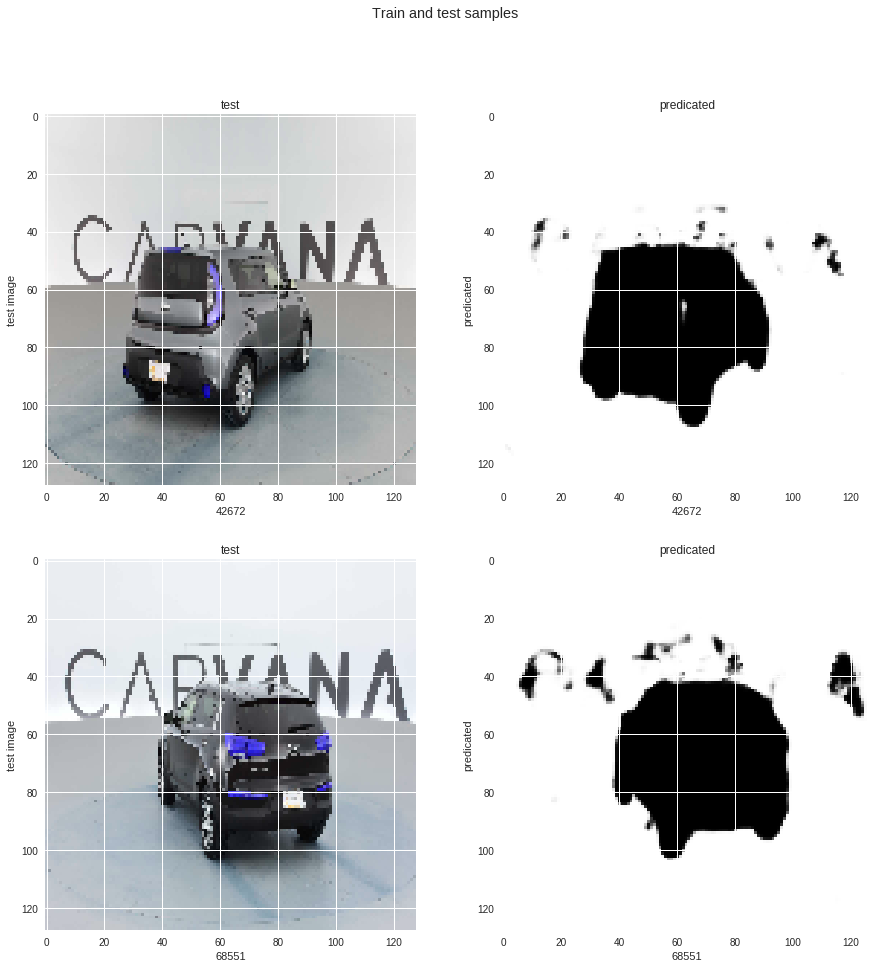

In [31]:
import random


i=0
fig=plt.figure(figsize=(15,15))


for index in random.sample(range(len(all_test_images)),2):
    x_batch=[]
    x_pathname =img_test_dir+ all_test_images[index]
    
    img = cv2.imread(x_pathname)
    img = cv2.resize(img, (128, 128))
    x_batch.append(img)
    x_batch = np.array(x_batch, np.float32) / 255
    predicted_label = model.predict_on_batch(x_batch)[0]
    
    i=i+1
    ax1 = fig.add_subplot(2,2,i)
    ax1.set(ylabel='test image', xlabel=index)
    ax1.set_title("test")
    ax1.imshow(img)
    
    i=i+1
    ax1 = fig.add_subplot(2,2,i)
    ax1.set(ylabel='predicated', xlabel=index)
    ax1.set_title("predicated")
    ax1.imshow(predicted_label[:, :, 0])
    
    
plt.suptitle("Train and test samples")
plt.show()

In [0]:
def get_layer_outputs():
    original_img = load_img(img_dir + samples[100][0])

    resized_img = imresize(original_img, dims+[3])
    test_image = resized_img
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([np.expand_dims(test_image, axis=0), 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):    
    layer_outputs = get_layer_outputs()

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]


    for img in L:
        plt.figure()
        plt.imshow(img)
        
plot_layer_outputs(68)